In [49]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
housing = pd.read_csv("/Users/ravin/Desktop/DSProject/housing.csv")

In [47]:
housing.shape

(20640, 10)

In [48]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
categorical = housing.dtypes[housing.dtypes == "object"].index
print(categorical)

housing[categorical].describe()

Index(['ocean_proximity'], dtype='object')


,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [ ]:
#Goal: Conduct an analysis on California's housing market, focusing on trends, pricing, and affordability 

In [13]:
#NA Values/Outliers
dummy_vector = pd.Series([1,None,3,None,7,8])
dummy_vector.isnull()

0    False
1     True
2    False
3     True
4    False
5    False
dtype: bool

In [16]:
missing_longitude = np.where(housing["longitude"].isnull() == True)
missing_longitude

(array([], dtype=int64),)

array([[<AxesSubplot:title={'center':'longitude'}>]], dtype=object)

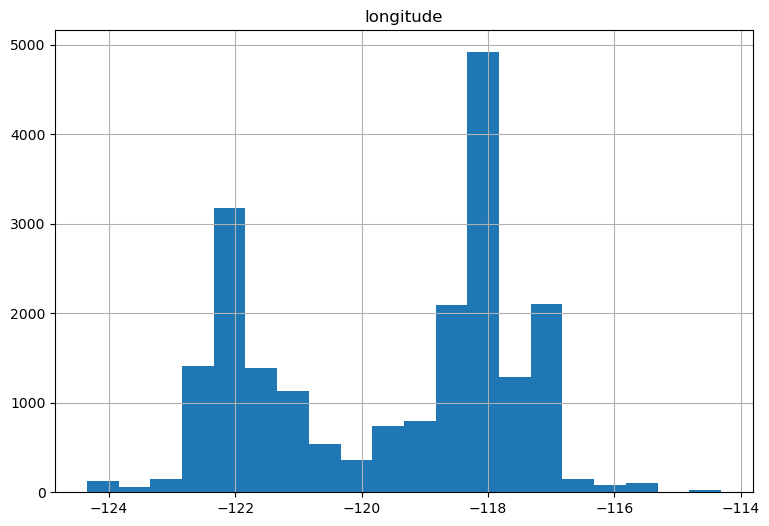

In [17]:
housing.hist(column = "longitude",
            figsize = (9,6),
            bins = 20)

In [19]:
housing["longitude"].describe()

count    20640.000000
mean      -119.569704
std          2.003532
min       -124.350000
25%       -121.800000
50%       -118.490000
75%       -118.010000
max       -114.310000
Name: longitude, dtype: float64

In [20]:
#Bedrooms has some missing values 
missing_bedrooms = np.where(housing["total_bedrooms"].isnull() == True)
missing_bedrooms

(array([  290,   341,   538,   563,   696,   738,  1097,  1350,  1456,
         1493,  1606,  2028,  2115,  2301,  2323,  2334,  2351,  2412,
         2420,  2578,  2608,  2647,  2826,  3024,  3328,  3354,  3376,
         3482,  3485,  3529,  3721,  3778,  3912,  3921,  3958,  4043,
         4046,  4186,  4279,  4309,  4391,  4447,  4496,  4591,  4600,
         4629,  4667,  4691,  4738,  4743,  4744,  4767,  4852,  5059,
         5216,  5222,  5236,  5654,  5665,  5678,  5723,  5751,  5990,
         6052,  6068,  6220,  6241,  6253,  6298,  6421,  6541,  6590,
         6814,  6835,  6962,  7097,  7113,  7168,  7191,  7228,  7316,
         7330,  7547,  7654,  7668,  7763,  7806,  8337,  8383,  8530,
         8915,  9149,  9571,  9620,  9622,  9814,  9845,  9877,  9942,
         9970, 10033, 10216, 10236, 10385, 10389, 10428, 10495, 10761,
        10885, 10915, 11096, 11311, 11351, 11441, 11449, 11512, 11741,
        12101, 12414, 12570, 12809, 13015, 13069, 13311, 13332, 13336,
      

array([[<AxesSubplot:title={'center':'total_bedrooms'}>]], dtype=object)

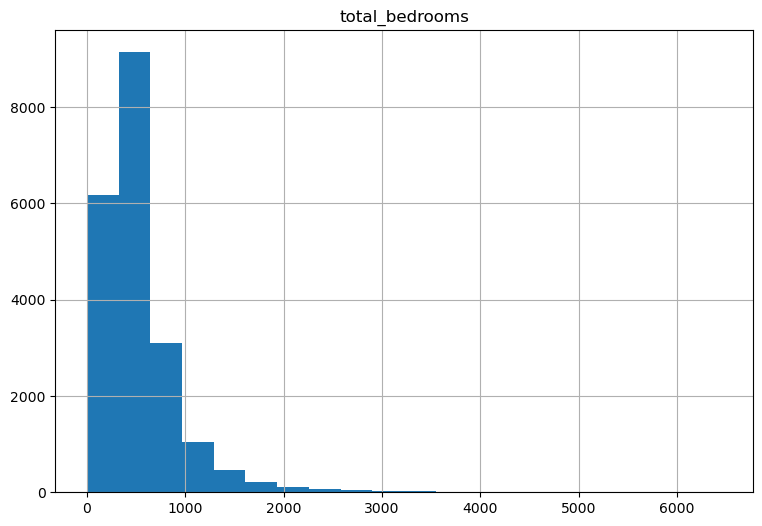

In [21]:
housing.hist(column = "total_bedrooms",
            figsize = (9,6),
            bins = 20)

In [30]:
target_total_bedrooms = 'total_bedrooms'
total_bedrooms_variable = housing[target_total_bedrooms]
median_value = total_bedrooms_variable.median()
median_value

435.0

In [31]:
new_total_bed_variable = np.where(housing["total_bedrooms"].isnull(),
                                 435,
                                 housing["total_bedrooms"])
housing["total_bedrooms"] = new_total_bed_variable
housing["total_bedrooms"].describe()

count    20640.000000
mean       536.838857
std        419.391878
min          1.000000
25%        297.000000
50%        435.000000
75%        643.250000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [34]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:>

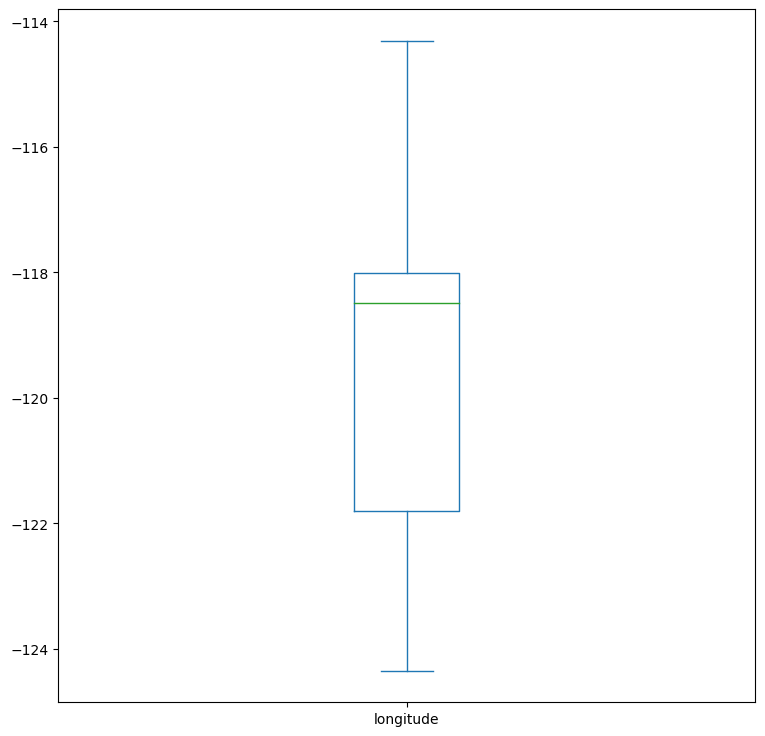

In [35]:
#Outliers
housing["longitude"].plot(kind = "box",
                         figsize =(9,9))
#No Outliers

<AxesSubplot:>

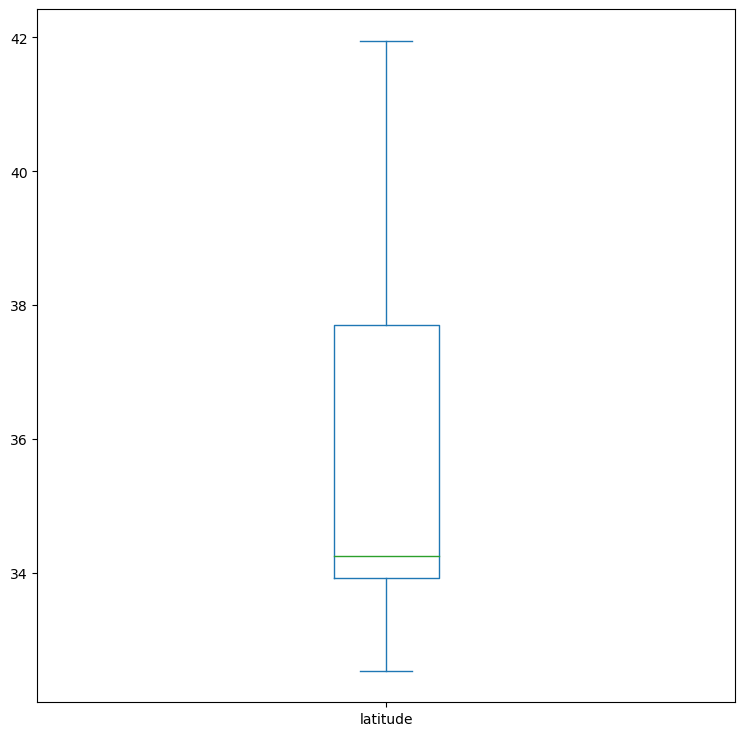

In [36]:
housing["latitude"].plot(kind = "box",
                         figsize =(9,9))
#No Outliers 

<AxesSubplot:>

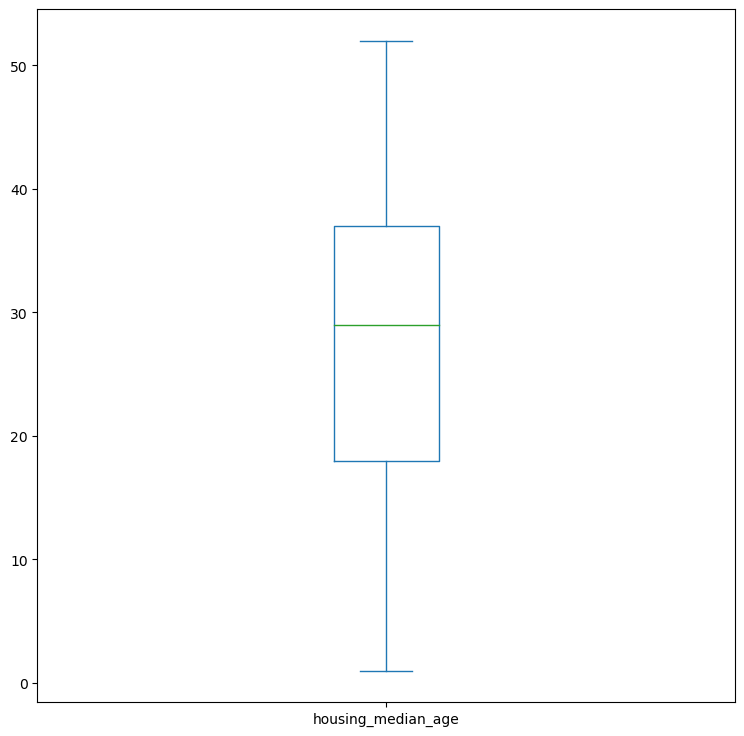

In [37]:
housing["housing_median_age"].plot(kind = "box",
                         figsize =(9,9))
#No Outliers

<AxesSubplot:>

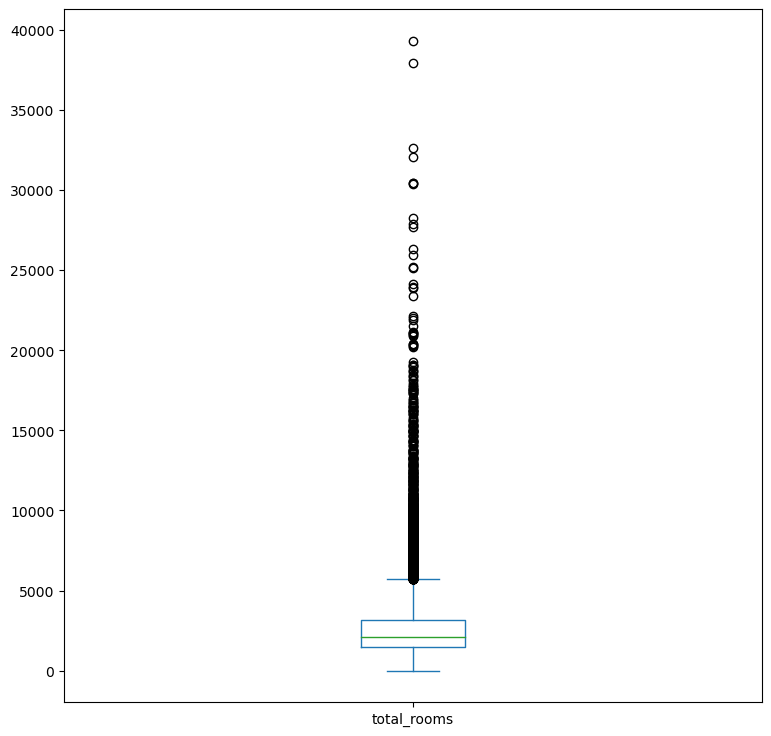

In [38]:
housing["total_rooms"].plot(kind = "box",
                         figsize =(9,9))
#Total_rooms has ALOT of outliers, too much, so will keep as removing them will skew the data too much 

<AxesSubplot:>

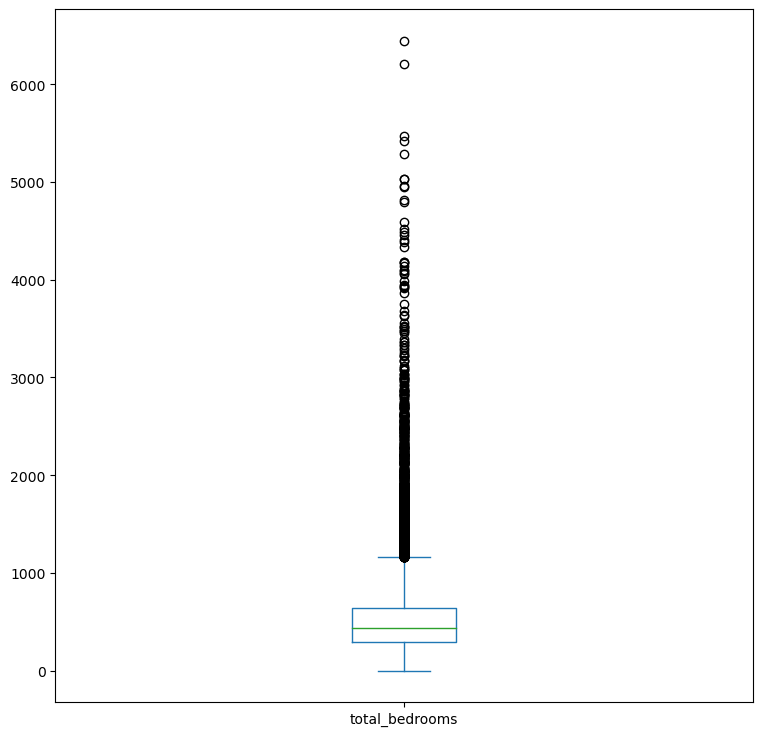

In [39]:
housing["total_bedrooms"].plot(kind = "box",
                         figsize =(9,9))
#Total_bedrooms has ALOT of outliers, too much, so will keep as removing them will skew the data too much 

<AxesSubplot:>

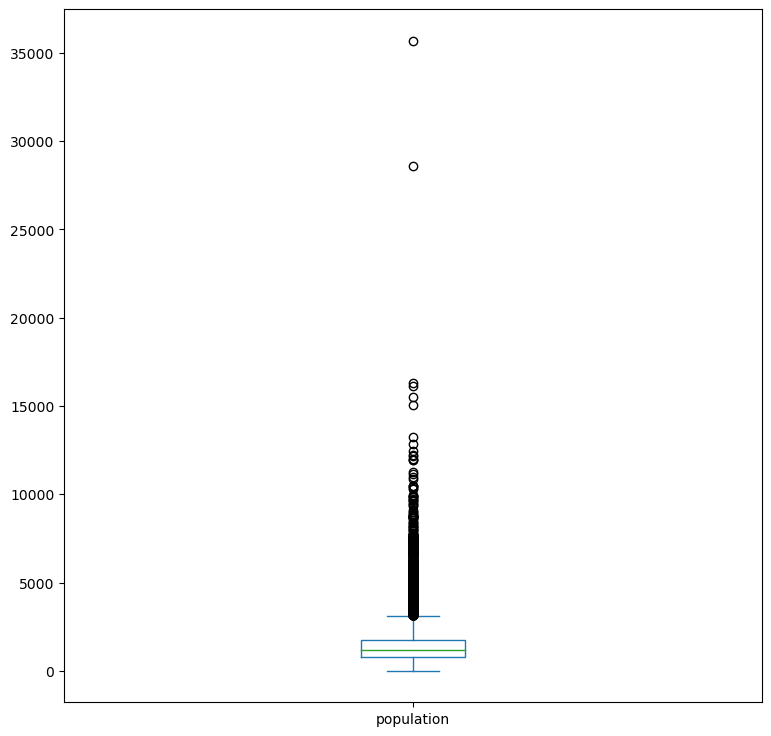

In [40]:
housing["population"].plot(kind = "box",
                         figsize =(9,9))
#Total_bedrooms has ALOT of outliers, too much, so will keep as removing them will skew the data too much 

In [44]:
#Convert the ocean variable to categorical 
housing['ocean_proximity'] = housing['ocean_proximity'].astype('category')
summary_statistics = housing.describe()
summary_statistics

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


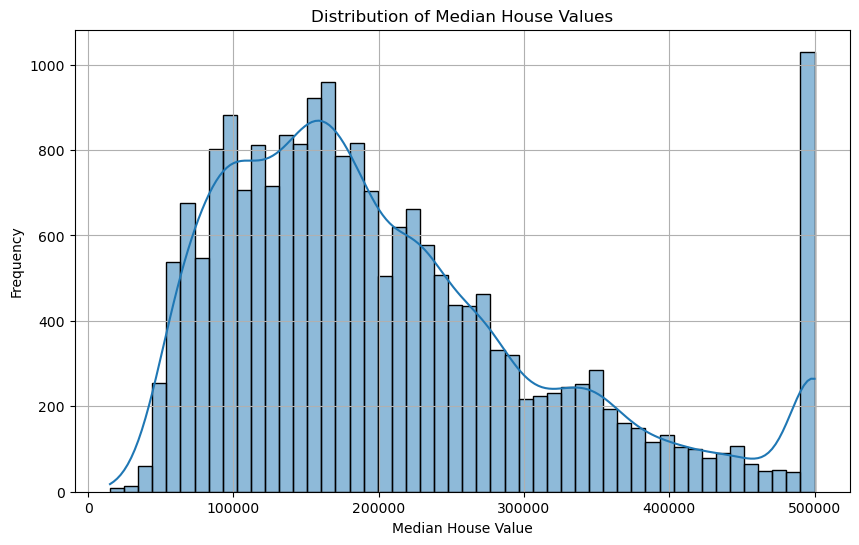

In [50]:
#Conducting Boxplot And Histogram of Media House Value (after all total_bedroom is taken into account)
plt.figure(figsize=(10, 6))
sns.histplot(housing['median_house_value'], bins=50, kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Relationship Between Median House Value And Frequency')

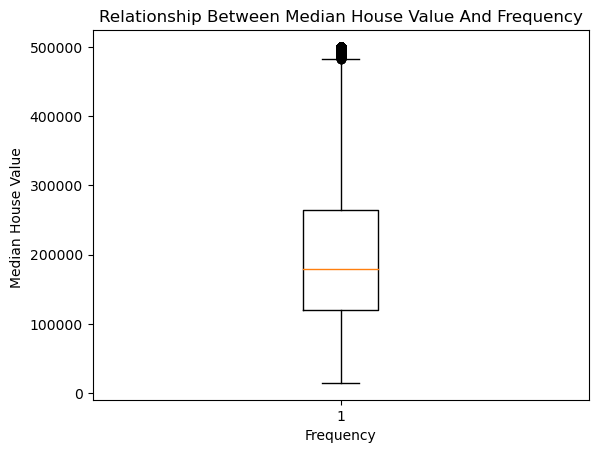

In [53]:
plt.boxplot(housing['median_house_value'])
plt.xlabel('Frequency')
plt.ylabel('Median House Value ')
plt.title('Relationship Between Median House Value And Frequency')


In [54]:
git clone <repository_url>

SyntaxError: invalid syntax (87712501.py, line 1)